In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers, Sequential

In [48]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = 'yoga_data/train' ,
    labels='inferred' ,
    label_mode='int',
    batch_size=32 ,
    image_size=(256, 256),
    shuffle=True
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    directory = 'yoga_data/test' ,
    labels='inferred' ,
    label_mode='int',
    batch_size=32 ,
    image_size=(256, 256),
    shuffle=False    
)

Found 788 files belonging to 5 classes.
Found 200 files belonging to 5 classes.


In [6]:
class_names = train_ds.class_names
class_names

['Downdog', 'Goddess', 'Plank', 'Tree', 'Warrior2']

In [4]:
test_ds.class_names

['Downdog', 'Goddess', 'Plank', 'Tree', 'Warrior2']

####  labels='inferred' gives folder names as class labels & sorts them alphabetically 

## Visualizing if we have correct images with thier labels

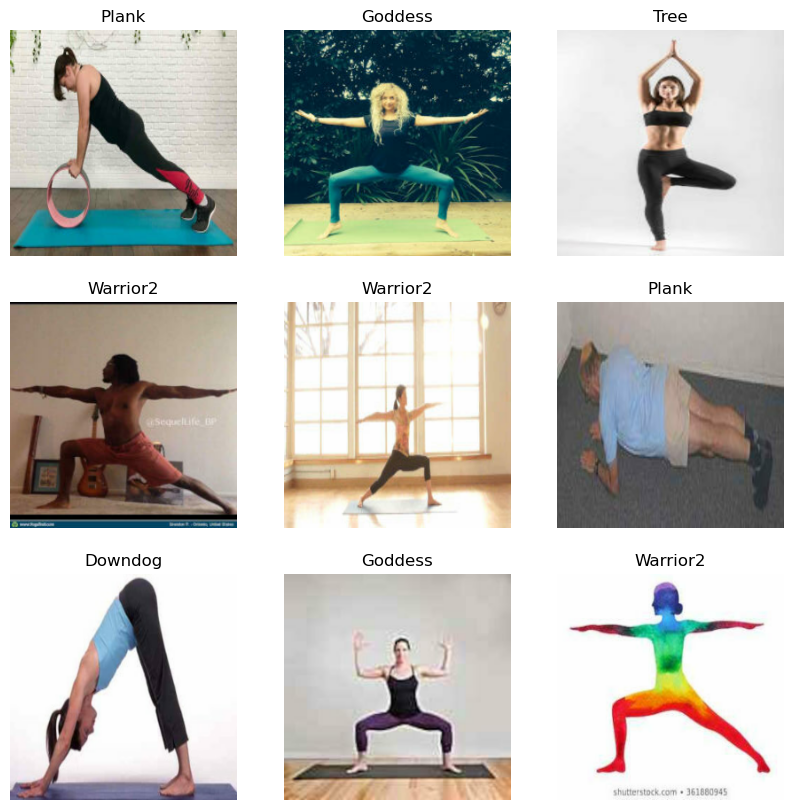

In [7]:
import matplotlib.pyplot as plt

for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [ ]:
layers.Rescaling(1./255)


In [30]:
model = Sequential([
    layers.Input(shape=(256, 256, 3)),
    layers.Rescaling(1./255),

    layers.Conv2D(
        filters=32,
        kernel_size=3,
        strides=(1, 1),
        padding='valid',
        activation='relu'
    ),

    layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
     
    
    layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])

    


In [31]:
model.compile( optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 516128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │      33,032,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,033,477 (126.01 MB)

 Trainable params: 33,033,477 (126.01 MB)

 Non-trainable params: 0 (0.00 B)

### early stopping

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(
    monitor='loss',
    patience=2,
    restore_best_weights=True
)


In [33]:
model.fit( train_ds,
    batch_size=64,
    epochs=10,
    verbose='auto',)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 296ms/step - accuracy: 0.2475 - loss: 9.5786 
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 271ms/step - accuracy: 0.5647 - loss: 1.2314
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 274ms/step - accuracy: 0.8782 - loss: 0.5619
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 271ms/step - accuracy: 0.9556 - loss: 0.3271
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 314ms/step - accuracy: 0.9797 - loss: 0.1896
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 301ms/step - accuracy: 0.9924 - loss: 0.1278
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 301ms/step - accuracy: 0.9937 - loss: 0.0940
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 309ms/step - accuracy: 0.9987 - loss: 0.0544
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 283ms/step - accuracy: 0.9987 - loss: 0.0331
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 270ms/step - accuracy: 1.0000 - loss: 0.0225


In [49]:
model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7850 - loss: 0.8054 


[0.8053643107414246, 0.7850000262260437]

In [50]:
y_pred = model.predict(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step 


In [51]:
y_pred

array([[4.65611726e-01, 1.43719822e-01, 3.31941098e-01, 3.79127935e-02,
        2.08146591e-02],
       [9.17784810e-01, 2.18166560e-02, 1.33587327e-02, 2.18794215e-03,
        4.48519252e-02],
       [9.98483241e-01, 1.84412147e-05, 6.69405563e-05, 3.88843455e-06,
        1.42749562e-03],
       [9.31928515e-01, 8.17602314e-03, 5.46180382e-02, 2.10928684e-03,
        3.16813635e-03],
       [9.99994755e-01, 1.56132228e-06, 2.27294251e-07, 5.62789093e-10,
        3.42352018e-06],
       [9.88014519e-01, 5.61651075e-04, 6.33851252e-03, 4.53236600e-04,
        4.63209953e-03],
       [2.59520416e-03, 3.53460922e-03, 5.43005586e-01, 4.47237909e-01,
        3.62671097e-03],
       [9.94455636e-01, 3.53537803e-03, 1.40027129e-04, 3.19960600e-06,
        1.86586543e-03],
       [9.88537908e-01, 1.04329130e-03, 3.77691700e-03, 2.96107348e-04,
        6.34586345e-03],
       [9.97853220e-01, 1.70763102e-04, 7.42458578e-05, 3.82242297e-06,
        1.89786649e-03],
       [1.01008765e-01, 5.1398

In [52]:
y_pred_labels = np.argmax(y_pred, axis=1)
y_pred_labels

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4,
       0, 0, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 3, 0, 0, 2, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 3, 1, 4, 3, 1, 3, 3, 3, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 4, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 3, 4, 4, 3, 4, 4,
       4, 4, 3, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 3,
       0, 1])

In [53]:
y_pred_labels.shape

(200,)

In [55]:
test_ds.class_names

['Downdog', 'Goddess', 'Plank', 'Tree', 'Warrior2']

In [54]:
y_true = np.concatenate([
    y for _, y in test_ds
], axis=0)
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4], dtype=int32)

In [56]:
y_true.shape

(200,)

In [57]:
accuracy = np.mean(y_pred_labels == y_true)
print("Accuracy:", accuracy)

Accuracy: 0.785


In [58]:
correct = np.sum(y_pred_labels == y_true)
total = len(y_true)

print(f"Correct: {correct}/{total}")


Correct: 157/200


In [59]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred_labels)
print(cm)


[[28  3  7  1  1]
 [ 0 27  1  8  4]
 [ 0  3 36  1  0]
 [ 0  0  3 36  1]
 [ 1  3  0  6 30]]
